In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go

import pandas as pd

# reading the hex2vec dataframe
tagged_df = pd.read_pickle(
    '/gcsmount-notebook/navish/dataframes/ALL_Boston_all_loc_route_w_tags.pkl')

drop_list = []
for col in tagged_df.columns:
    try:
        if tagged_df[col].sum() == 0:
            drop_list.append(col)
    except:
        pass

tagged_df = tagged_df.drop(drop_list, axis=1)


# reading in the saved dataframe
# tagged_df = pd.read_pickle(
#     '/gcsmount-notebook/navish/dataframes/hexagonal_regression_pred_df.pkl')


In [3]:
tagged_df.shape

(139304, 713)

In [100]:
tagged_df.iloc[:, -25:][:5]

,tourism_guest_house,tourism_hostel,tourism_motel,tourism_yes,water_basin,water_lake,water_pond,water_reservoir,water_river,water_canal,...,waterway_dam,waterway_dock,waterway_drain,waterway_river,waterway_stream,waterway_waterfall,waterway_weir,waterway_ditch,waterway_boatyard,waterway_fuel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
tagged_df['planned_service_time_sum'] = np.log(tagged_df['planned_service_time_sum'])

In [133]:
tagged_df_hex_avg = tagged_df.groupby('h3').mean().reset_index()
# tagged_df_hex_sum = tagged_df.groupby('h3').sum().reset_index()
# tagged_df = tagged_df.join(tagged_df.groupby('h3')['planned_service_time_sum'].mean(), on='h3', rsuffix='_grp_avg')
# tagged_df = tagged_df.join(tagged_df.groupby('h3')['planned_service_time_sum'].sum(), on='h3', rsuffix='_grp_sum')

In [134]:
tagged_df_hex_avg.head()

,h3,lat,lng,package_id_nunique,volume_mean,volume_sum,width_mean,height_mean,planned_service_time_mean,planned_service_time_sum,...,waterway_dam,waterway_dock,waterway_drain,waterway_river,waterway_stream,waterway_waterfall,waterway_weir,waterway_ditch,waterway_boatyard,waterway_fuel
0,892a302812bffff,42.305579,-70.896692,1.00,6668.281333,6668.281333,22.866667,7.600000,43.00,3.721406,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,892a3028133ffff,42.307587,-70.890112,2.60,23786.687460,58294.755800,29.591333,12.896000,67.16,4.800839,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,892a302813bffff,42.305793,-70.895615,1.00,1370.250000,1370.250000,29.000000,1.500000,28.00,3.332205,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,892a3028163ffff,42.306509,-70.904697,1.40,13348.216133,16343.518400,25.800000,11.626667,57.86,4.060508,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,892a3028167ffff,42.304425,-70.903967,1.25,19198.032500,28031.593500,26.937500,15.675000,41.75,3.875570,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
tagged_df_hex_avg.columns[:20]

Index(['h3', 'lat', 'lng', 'package_id_nunique', 'volume_mean', 'volume_sum',
       'width_mean', 'height_mean', 'planned_service_time_mean',
       'planned_service_time_sum', 'planned_service_time_min',
       'planned_service_time_max', 'has_window_max', 'executor_capacity_cm3',
       'aeroway_aerodrome', 'aeroway_apron', 'aeroway_helipad',
       'aeroway_runway', 'aeroway_hangar', 'aeroway_taxiway'],
      dtype='object')

## Regression Model

In [136]:
'planned_service_time_sum' in tagged_df_hex_avg.columns

True

In [137]:
from sklearn.model_selection import train_test_split

np.random.seed(0)

# -----------------------------------------
type='avg'

# getting rid of all the non-numeral data
df_train, df_test = train_test_split(tagged_df_hex_avg.drop(['lat', 'lng', 'package_id_nunique', 'volume_mean', 'volume_sum',
                                     'width_mean', 'height_mean', 'has_window_max', 'executor_capacity_cm3',
                                     'h3', 'planned_service_time_min', 'planned_service_time_max', 'planned_service_time_mean'], axis=1), train_size=0.8, test_size=0.2, random_state=100)

# -----------------------------------------
# type='sum'

# # getting rid of all the non-numeral data
# df_train, df_test = train_test_split(tagged_df_hex_sum.drop(['lat', 'lng', 'package_id_nunique', 'volume_mean', 'volume_sum',
                                    #  'width_mean', 'height_mean', 'has_window_max', 'executor_capacity_cm3',
                                    #  'h3', 'planned_service_time_min', 'planned_service_time_max', 'planned_service_time_mean', 
                                    #  'planned_service_time_sum','planned_service_time_sum_grp_avg',
                                    # 'hex_predicted_service_time_sum', 'hex_predicted_service_time_avg',
                                    # 'h3_predicted_service_time_sum', 'h3_predicted_service_time_avg',
                                    # 'pca-one', 'pca-two', 'pca-three', 'hex_discrepency_sum',
                                    # 'hex_discrepency_avg', 'h3_discrepency_avg'], axis=1), train_size=0.8, test_size=0.2, random_state=100)


In [138]:
from sklearn.preprocessing import StandardScaler

def scaled_df(df):
    
    scaler = StandardScaler()
    scaler.fit(df)

    return pd.DataFrame(scaler.fit_transform(df),
                        index=df.index, columns=df.columns)

df_train = scaled_df(df_train)


In [139]:
# Dividing data into X and y variables
y_train = df_train.pop('planned_service_time_sum')
X_train = df_train

In [140]:
# RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [141]:
from statsmodels.tools.tools import pinv_extended  
def build_model(X, y):
    X = sm.add_constant(X)  # Adding the constant
    model = sm.OLS(y, X)
    lm = model.fit()
    # lm = model.fit_regularized(L1_wt=1)  # fitting the l1 model
    # pinv_wexog,_ = pinv_extended(model.wexog)
    # normalized_cov_params = np.dot(pinv_wexog, np.transpose(pinv_wexog))
    # summary = sm.regression.linear_model.OLSResults(model,lm.params,normalized_cov_params)
    # print(lm.summary())  # model summary
    print(lm.summary())
    return X, lm.pvalues


def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(
        X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    return(vif)


In [142]:
X_train_new, pvalues = build_model(X_train, y_train)
insig_columns = [ind for j, ind in enumerate(
    pvalues.index) if pvalues[j] > 0.05]

                               OLS Regression Results                               
Dep. Variable:     planned_service_time_sum   R-squared:                       0.190
Model:                                  OLS   Adj. R-squared:                  0.157
Method:                       Least Squares   F-statistic:                     5.779
Date:                      Tue, 06 Sep 2022   Prob (F-statistic):               0.00
Time:                              18:00:41   Log-Likelihood:                -22436.
No. Observations:                     17080   AIC:                         4.621e+04
Df Residuals:                         16413   BIC:                         5.137e+04
Df Model:                               666                                         
Covariance Type:                  nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

In [143]:
X_train_new = X_train.drop(insig_columns[1:], axis=1)

In [144]:
X_train_new, pvalues = build_model(X_train_new, y_train)
insig_columns = [ind for j, ind in enumerate(
    pvalues.index) if pvalues[j] > 0.05]


                               OLS Regression Results                               
Dep. Variable:     planned_service_time_sum   R-squared:                       0.159
Model:                                  OLS   Adj. R-squared:                  0.155
Method:                       Least Squares   F-statistic:                     37.74
Date:                      Tue, 06 Sep 2022   Prob (F-statistic):               0.00
Time:                              18:00:43   Log-Likelihood:                -22759.
No. Observations:                     17080   AIC:                         4.569e+04
Df Residuals:                         16994   BIC:                         4.636e+04
Df Model:                                85                                         
Covariance Type:                  nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

In [145]:
X_train_new = X_train_new.drop(insig_columns[1:], axis=1)


In [146]:
X_train_new, pvalues = build_model(X_train_new, y_train)
insig_columns = [ind for j, ind in enumerate(
    pvalues.index) if pvalues[j] > 0.05]


                               OLS Regression Results                               
Dep. Variable:     planned_service_time_sum   R-squared:                       0.157
Model:                                  OLS   Adj. R-squared:                  0.154
Method:                       Least Squares   F-statistic:                     45.95
Date:                      Tue, 06 Sep 2022   Prob (F-statistic):               0.00
Time:                              18:00:44   Log-Likelihood:                -22776.
No. Observations:                     17080   AIC:                         4.569e+04
Df Residuals:                         17010   BIC:                         4.623e+04
Df Model:                                69                                         
Covariance Type:                  nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [147]:
# Calculating the Variance Inflation Factor
# checkVIF(X_train_new)


In [148]:
imp_pvalues = pvalues[pvalues.argsort()][:16]
imp_features = pvalues.index[pvalues.argsort()][:16]

fig = go.Figure(data = [go.Bar(y=imp_features, x=imp_pvalues, orientation='h')])
fig.update_layout(xaxis_title = "p-values", yaxis_title = "Features", title ='Most Significant features for OLS Model')

fig.show()
# fig.update_layout(barmode='horizontal')

In [149]:
len(X_train_new.columns)


72

In [150]:
lm = sm.OLS(y_train, X_train_new).fit()
y_train_price = lm.predict(X_train_new)


/opt/conda/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 0, 'Errors')

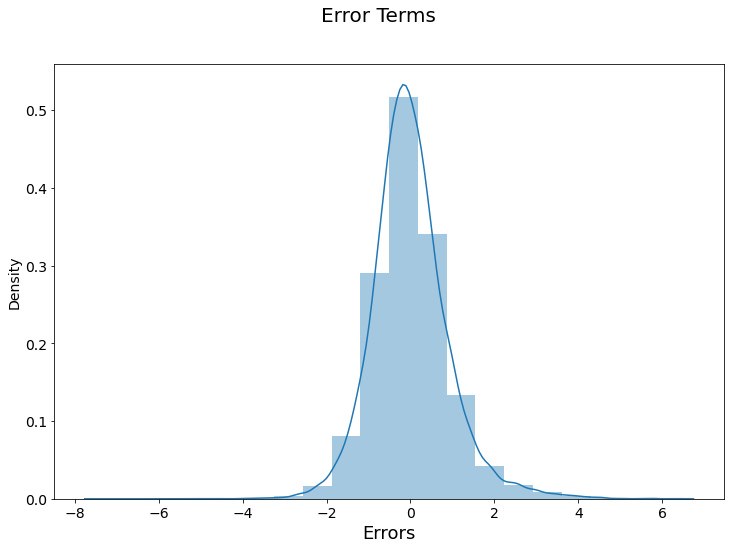

In [151]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins=20)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading
plt.xlabel('Errors', fontsize=18)


In [152]:
# if type=='sum':
#     Full_data_h3 = tagged_df_hex_sum.drop(['lat', 'lng', 'route_id', 'package_id_nunique', 'volume_mean', 'volume_sum',
#                                      'width_mean', 'height_mean', 'has_window_max', 'executor_capacity_cm3',
#                                      'h3', 'planned_service_time_min', 'planned_service_time_max', 'planned_service_time_mean', 
#                                      'planned_service_time_sum', 'planned_service_time_sum_grp_avg', 'planned_service_time_sum_grp_sum',
#                                     'hex_predicted_service_time_sum', 'hex_predicted_service_time_avg',
#                                     'h3_predicted_service_time_sum', 'h3_predicted_service_time_avg',
#                                     'pca-one', 'pca-two', 'pca-three', 'hex_discrepency_sum',
#                                     'hex_discrepency_avg', 'h3_discrepency_avg'], axis=1)
# else:
#     Full_data_h3 = tagged_df_hex_avg.drop(['lat', 'lng', 'package_id_nunique', 'volume_mean', 'volume_sum',
#                                      'width_mean', 'height_mean', 'has_window_max', 'executor_capacity_cm3',
#                                      'h3', 'planned_service_time_min', 'planned_service_time_max', 'planned_service_time_mean', 
#                                      'planned_service_time_sum', 'planned_service_time_sum_grp_avg', 'planned_service_time_sum_grp_sum',
#                                     'hex_predicted_service_time_sum', 'hex_predicted_service_time_avg',
#                                     'h3_predicted_service_time_sum', 'h3_predicted_service_time_avg',
#                                     'pca-one', 'pca-two', 'pca-three', 'hex_discrepency_sum',
#                                     'hex_discrepency_avg', 'h3_discrepency_avg'], axis=1)

# Scaling the test set

df_test = scaled_df(df_test)
# Full_data_h3 = scaled_df(Full_data_h3)


In [153]:
# Dividing into X and y
y_test = df_test.pop('planned_service_time_sum')
X_test = df_test

In [154]:
def get_sigf_cols_df(df):
    # Now let's use our model to make predictions.
    for_col_df = X_train_new.drop('const', axis=1)
    # Creating X_test_new dataframe by dropping variables from X_test
    df = df[for_col_df.columns]
    df = sm.add_constant(df)
    return df

# Adding a constant variable
X_test_new = get_sigf_cols_df(X_test) 
# Full_data_h3 = get_sigf_cols_df(Full_data_h3)

In [155]:
# Making predictions
y_pred = lm.predict(X_test_new)


In [156]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.08988153016016387

Text(0, 0.5, 'y_pred')

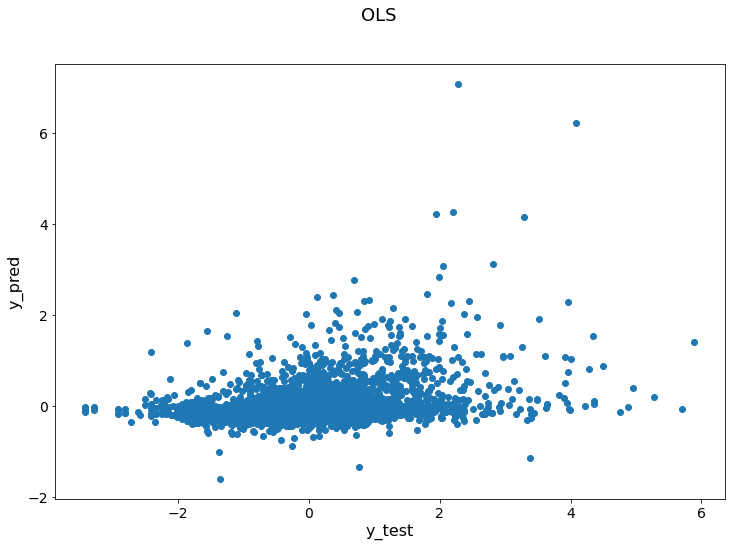

In [157]:
# EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
plt.scatter(y_test, y_pred)
plt.suptitle('OLS', fontsize=18)              # Plot heading
plt.xlabel('y_test', fontsize=16)                          # X-label
plt.ylabel('y_pred', fontsize=16)


In [178]:
sorted_pvalues = pvalues[pvalues.argsort()]
sorted_features = lm.params[pvalues.argsort()]
sorted_tvalues = lm.tvalues[pvalues.argsort()]

df = pd.concat((sorted_features, sorted_tvalues, sorted_pvalues), axis=1)

df.rename(columns={0: 'coefficients', 1: 't-stat', 2: 'p-values'}).to_excel('../output.xls', 'sheet1')

/tmp/ipykernel_4528/1475980315.py:7: FutureWarning:

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.



* Creating the entire dataset for prediction:

In [97]:
np.random.seed(0)

# getting rid of all the non-numeral data
tagged_df_test = tagged_df.drop(['lat', 'lng', 'route_id','has_window_max', 'city','city_zone', 'zone_id', 'status', 'departure_datetime_mean',
                                'h3', 'planned_service_time_min', 'planned_service_time_max', 'planned_service_time_mean','planned_service_time_sum',
                                'planned_service_time_sum_grp_avg', 'planned_service_time_sum_grp_avg', 'planned_service_time_sum_grp_sum',
                                    'hex_predicted_service_time_sum', 'hex_predicted_service_time_avg',
                                    'h3_predicted_service_time_sum', 'h3_predicted_service_time_avg',
                                    'pca-one', 'pca-two', 'pca-three', 'hex_discrepency_sum',
                                    'hex_discrepency_avg', 'h3_discrepency_avg'], axis=1)
tagged_df_test = scaled_df(tagged_df_test)

# Adding a constant variable
tagged_X_test_new = get_sigf_cols_df(tagged_df_test)


# Making predictions
tagged_df_hex_sum['h3_predicted_service_time_' + f'{type}'] = lm.predict(Full_data_h3)
tagged_df['hex_predicted_service_time_'+ f'{type}'] = lm.predict(tagged_X_test_new)

# For hexagonal level prediction by just using hexagonal fetaures which are summed and averaged
tagged_df['h3_predicted_service_time_' + f'{type}'] = tagged_df['h3'].map(tagged_df_hex_sum.set_index('h3')['h3_predicted_service_time_' + f'{type}'])

# save this dataframe
pd.to_pickle(tagged_df, '/gcsmount-notebook/navish/dataframes/hexagonal_regression_pred_df.pkl')

ValueError: No axis named 1 for object type Series

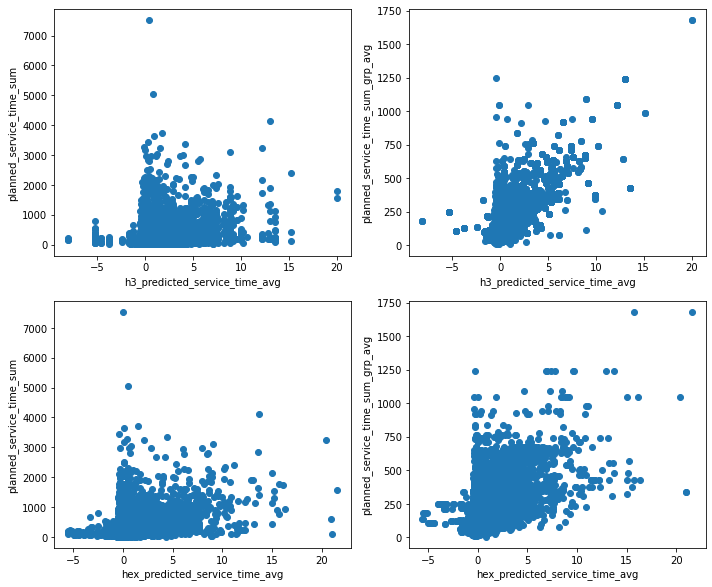

In [ ]:
def scatter(x,y, fig):
    plt.subplot(5,2,fig)
    plt.scatter(tagged_df[x], tagged_df[y])
    # plt.suptitle('OLS')              
    plt.xlabel(x)                         
    plt.ylabel(y)

plt.figure(figsize=(10,20))

scatter('h3_predicted_service_time_'+ f'{type}', 'planned_service_time_sum', 1)
scatter('h3_predicted_service_time_'+ f'{type}', 'planned_service_time_sum_grp_'+ f'{type}', 2)
scatter('hex_predicted_service_time_'+ f'{type}', 'planned_service_time_sum', 3)
scatter('hex_predicted_service_time_'+ f'{type}', 'planned_service_time_sum_grp_'+ f'{type}', 4)


plt.tight_layout()

In [154]:
print(lm.summary())


                                   OLS Regression Results                                   
Dep. Variable:     planned_service_time_sum_grp_avg   R-squared:                       0.453
Model:                                          OLS   Adj. R-squared:                  0.450
Method:                               Least Squares   F-statistic:                     137.9
Date:                              Mon, 05 Sep 2022   Prob (F-statistic):               0.00
Time:                                      13:47:28   Log-Likelihood:                -19082.
No. Observations:                             17080   AIC:                         3.837e+04
Df Residuals:                                 16977   BIC:                         3.917e+04
Df Model:                                       102                                         
Covariance Type:                          nonrobust                                         
                                        coef    std err          t    

## Regression using other algorithms

In [91]:
np.random.seed(0)

# getting rid of all the non-numeral data
df_train, df_test = train_test_split(tagged_df_hex.drop(['lat', 'lng', 'has_window_max',
                                     'h3', 'planned_service_time_min', 'planned_service_time_max', 'planned_service_time_mean'], axis=1), train_size=0.8, test_size=0.2, random_state=100)

scaler = StandardScaler()
scaler.fit(df_train)

# num_vars = ['height', 'width', 'volume', 'intraday_sec', 'planned_service_time']
# df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train = pd.DataFrame(
    scaler.fit_transform(df_train), index=df_train.index, columns=df_train.columns)

# Dividing data into X and y variables
y_train = df_train.pop('planned_service_time_sum')
X_train = df_train.reset_index(drop=True)


In [92]:
# Scaling the test set

# If we want to only scale certain features
# num_vars = ['height','width', 'city_zone_2_num', 'month']
# df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

df_test = pd.DataFrame(
    scaler.fit_transform(df_test), index=df_test.index, columns=df_test.columns)

# Dividing data into X and y variables
y_test = df_test.pop('planned_service_time_sum')
X_test = df_test.reset_index(drop=True)


1. AdaBoost

In [58]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
AdaBoost = AdaBoostRegressor(random_state=0, base_estimator=DecisionTreeRegressor(
    max_depth=3), loss='linear', n_estimators=2000)
AdaBoost.fit(X_train, y_train)


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  n_estimators=2000, random_state=0)

In [59]:
AdaBoost.score(X_train, y_train)


0.16921356594267467

In [60]:
AdaBoost.score(X_test, y_test)


0.0346116085899677

Text(0, 0.5, 'y_pred')

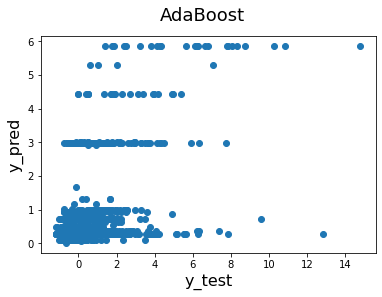

In [61]:
# EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test, AdaBoost.predict(X_test))
fig.suptitle('AdaBoost', fontsize=18)              # Plot heading
plt.xlabel('y_test', fontsize=16)                          # X-label
plt.ylabel('y_pred', fontsize=16)


3. ExtraTrees

In [37]:
from sklearn.ensemble import ExtraTreesRegressor

ET = ExtraTreesRegressor(random_state=0, n_estimators=200)
ET.fit(X_train, y_train)


: 

: 

In [ ]:
ET.score(X_train, y_train)


0.7676745250783366

In [ ]:
ET.score(X_test, y_test)


-0.02392496209796291

In [ ]:
# EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test, ET.predict(X_test))
fig.suptitle('ExtraTrees', fontsize=18)              # Plot heading
plt.xlabel('y_test', fontsize=16)                          # X-label
plt.ylabel('y_pred', fontsize=16)


4. GradientBoost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

GB = GradientBoostingRegressor(
    random_state=0, learning_rate=0.1, loss='huber', n_estimators=20)
GB.fit(X_train, y_train)


GradientBoostingRegressor(loss='huber', n_estimators=20, random_state=0)

In [ ]:
GB.score(X_train, y_train)


0.03117654669903558

In [ ]:
GB.score(X_test, y_test)


0.07078943044100616

5. RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(random_state=0, n_estimators=20)
RF.fit(X_train, y_train)


RandomForestRegressor(n_estimators=20, random_state=0)

In [ ]:
RF.score(X_train, y_train)


0.6236968931395168

In [ ]:
RF.score(X_test, y_test)


-0.00940441784824908

### Seeing the Feature Importance

In [63]:
# !pip install shap

In [44]:
import shap

In [80]:
def plot_importance(name, regr):
    sorted_idx = regr.feature_importances_.argsort()
    plt.barh(X_train.columns[sorted_idx[-25:]],
             regr.feature_importances_[sorted_idx[-25:]])
    plt.xlabel(f"{name} Feature Importance")


In [73]:
from sklearn.inspection import permutation_importance


def perm_importance(name, regr):
    perm_importance = permutation_importance(regr, X_test, y_test)
    sorted_idx = perm_importance.importances_mean.argsort()
    plt.barh(X_train.columns[sorted_idx[-20:]],
             perm_importance.importances_mean[sorted_idx[-20:]])
    plt.xlabel(f"{name} Permutation Importance")


#### Visualisation using SHAP

In [74]:
def shap_plots(name, regr, plot):

    explainer = shap.TreeExplainer(regr, check_additivity=False)
    shap_values = explainer.shap_values(X_test)

    # Feature value ('dot') or just feature importance ('bar)
    shap.summary_plot(shap_values[:20], X_test, plot_type=plot)


#### Let's compare now!

1. AdaBoost

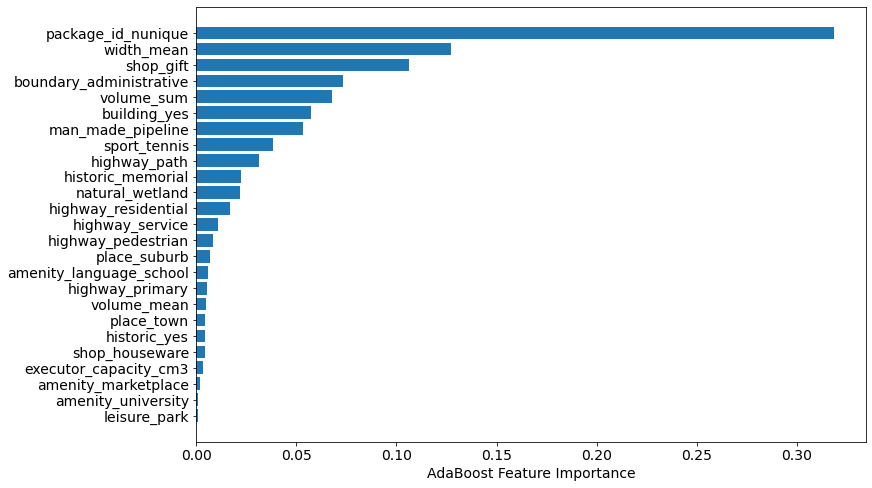

In [81]:
plot_importance('AdaBoost', AdaBoost)


In [82]:
# perm_importance('AdaBoost', AdaBoost)

In [ ]:
# shap_plots('AdaBoost', AdaBoost, 'dot')


2. ExtraTrees

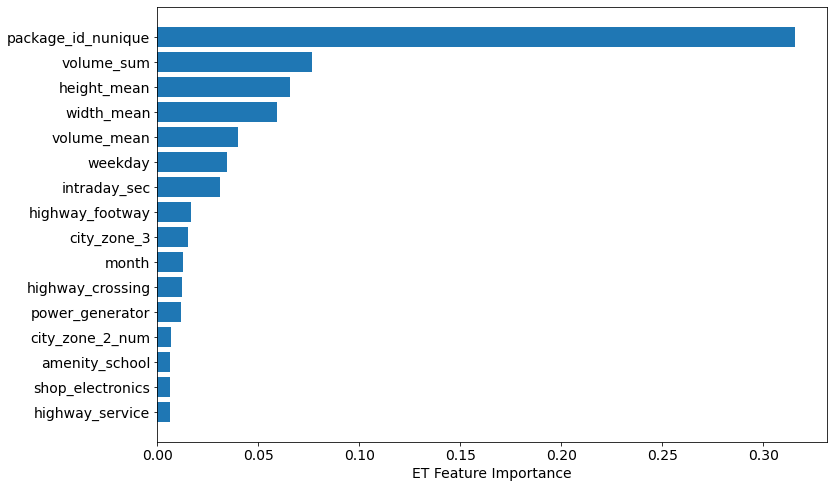

In [ ]:
plot_importance('ET', ET)


In [ ]:
shap_plots('ET', ET, 'dot')


3. GradientBoost

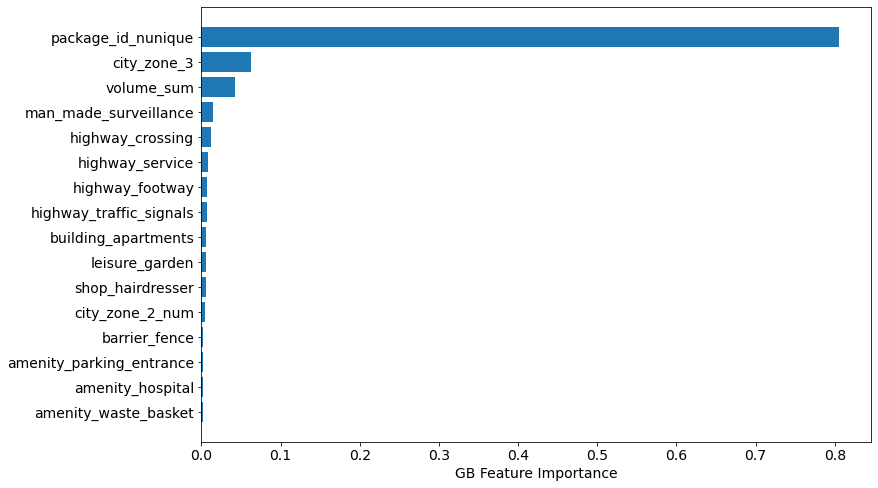

In [ ]:
plot_importance('GB', GB)


In [ ]:
shap_plots('GB', GB, 'dot')


4. RandomForest

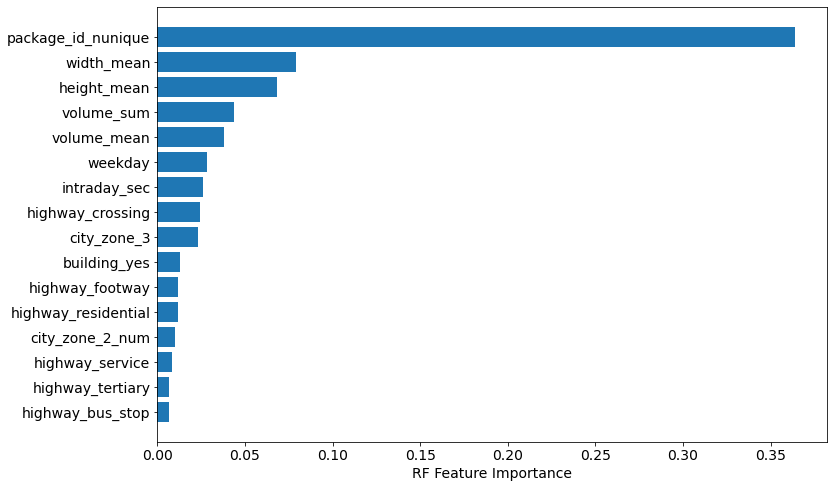

In [ ]:
plot_importance('RF', RF)


In [ ]:
# shap_plots('RF', RF, 'dot')

##### Plotting the within zone discrepencies on Test Data

In [29]:
df_test.head()

,package_id_nunique,volume_mean,volume_sum,width_mean,height_mean,executor_capacity_cm3,aeroway_aerodrome,aeroway_apron,aeroway_helipad,aeroway_runway,...,waterway_dam,waterway_dock,waterway_drain,waterway_river,waterway_stream,waterway_waterfall,waterway_weir,waterway_ditch,waterway_boatyard,waterway_fuel
3812,-0.413960,0.112985,-0.189284,1.543347,-0.431557,0.691175,-0.029363,-0.005991,-0.030563,-0.010377,...,-0.082968,-0.019067,-0.023209,-0.179107,-0.356835,-0.008473,-0.049408,-0.033104,-0.008473,-0.010377
136240,0.363481,0.166806,0.314828,-0.743568,0.974231,0.691175,-0.029363,-0.005991,-0.030563,-0.010377,...,-0.082968,-0.019067,-0.023209,-0.179107,7.589520,-0.008473,-0.049408,-0.033104,-0.008473,-0.010377
93107,2.695803,-0.308315,0.586462,-0.496132,-0.078270,0.691175,-0.029363,-0.005991,-0.030563,-0.010377,...,-0.082968,-0.019067,-0.023209,-0.179107,2.291950,-0.008473,-0.049408,-0.033104,-0.008473,-0.010377
49299,-0.413960,0.859843,0.175952,1.153447,0.687185,-1.446811,-0.029363,-0.005991,-0.030563,-0.010377,...,-0.082968,-0.019067,-0.023209,-0.179107,-0.356835,-0.008473,-0.049408,-0.033104,-0.008473,-0.010377
80821,0.363481,1.221269,1.346158,0.598589,0.863828,-1.446811,-0.029363,-0.005991,-0.030563,-0.010377,...,-0.082968,-0.019067,-0.023209,-0.179107,-0.356835,-0.008473,-0.049408,-0.033104,-0.008473,-0.010377
